In [98]:
import requests
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
API_KEY = 'YOUR_API_KEY'

In [3]:
base_url = 'https://api.weatherapi.com/v1'

In [4]:
def get_weather(city):
    url = base_url + f"/current.json?q={city}&key={API_KEY}"
    response = requests.get(url)
    # data = response.json()
    data = json.loads(response.text)
    return data

In [5]:
# get_weather('Asansol')

In [6]:
def get_forecast(city, days=14):
    url = base_url + f"/forecast.json?q={city}&days={days}&key={API_KEY}"
    response = requests.get(url)
    # data = response.json()
    data = json.loads(response.text)
    return data

In [23]:
forecast = get_forecast("New Zealand")

In [24]:
forecast.keys()

dict_keys(['location', 'current', 'forecast'])

In [25]:
# forecast['location']

In [26]:
# forecast['current']

In [27]:
forecast['forecast']['forecastday']

[{'date': '2025-07-11',
  'date_epoch': 1752192000,
  'day': {'maxtemp_c': 13.4,
   'maxtemp_f': 56.2,
   'mintemp_c': 12.4,
   'mintemp_f': 54.2,
   'avgtemp_c': 13.0,
   'avgtemp_f': 55.4,
   'maxwind_mph': 25.3,
   'maxwind_kph': 40.7,
   'totalprecip_mm': 17.4,
   'totalprecip_in': 0.69,
   'totalsnow_cm': 0.0,
   'avgvis_km': 8.5,
   'avgvis_miles': 5.0,
   'avghumidity': 85,
   'daily_will_it_rain': 1,
   'daily_chance_of_rain': 91,
   'daily_will_it_snow': 0,
   'daily_chance_of_snow': 0,
   'condition': {'text': 'Moderate rain',
    'icon': '//cdn.weatherapi.com/weather/64x64/day/302.png',
    'code': 1189},
   'uv': 0.2},
  'astro': {'sunrise': '07:45 AM',
   'sunset': '05:08 PM',
   'moonrise': '05:09 PM',
   'moonset': '08:11 AM',
   'moon_phase': 'Waning Gibbous',
   'moon_illumination': 100,
   'is_moon_up': 1,
   'is_sun_up': 0},
  'hour': [{'time_epoch': 1752148800,
    'time': '2025-07-11 00:00',
    'temp_c': 13.3,
    'temp_f': 55.9,
    'is_day': 0,
    'condition': 

In [28]:
# forecast['forecast']['forecastday'][0]['hour']

### Temperature trend over 14 days

In [39]:
date = []
min_temp = []
max_temp = []
avg_temp = []
condition_text = []

for pred in forecast['forecast']['forecastday']:
    date.append(pred['date'])
    min_temp.append(pred['day']['mintemp_c'])
    max_temp.append(pred['day']['maxtemp_c'])
    avg_temp.append(pred['day']['avgtemp_c'])

df = pd.DataFrame({'Date':date, 'Min temp':min_temp, 'Max temp':max_temp, 'Avg temp':avg_temp})

In [59]:
# df

(array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
        13.]),
 [Text(0.0, 0, '2025-07-11'),
  Text(1.0, 0, '2025-07-12'),
  Text(2.0, 0, '2025-07-13'),
  Text(3.0, 0, '2025-07-14'),
  Text(4.0, 0, '2025-07-15'),
  Text(5.0, 0, '2025-07-16'),
  Text(6.0, 0, '2025-07-17'),
  Text(7.0, 0, '2025-07-18'),
  Text(8.0, 0, '2025-07-19'),
  Text(9.0, 0, '2025-07-20'),
  Text(10.0, 0, '2025-07-21'),
  Text(11.0, 0, '2025-07-22'),
  Text(12.0, 0, '2025-07-23'),
  Text(13.0, 0, '2025-07-24')])

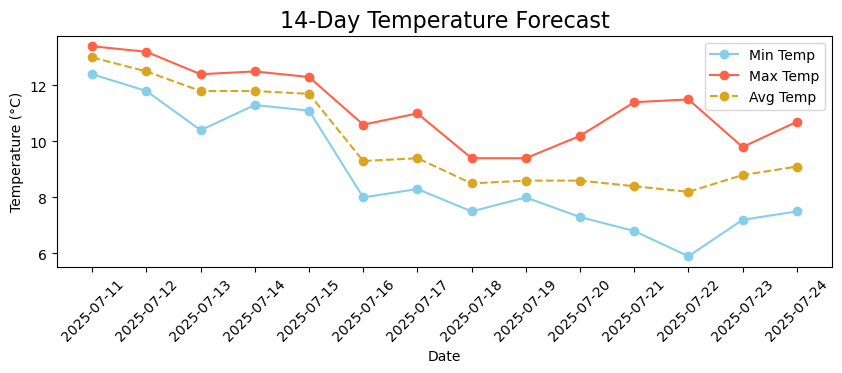

In [61]:
plt.figure(figsize=(10, 3))
plt.plot(df.Date, df['Min temp'], label='Min Temp', color='skyblue', marker='o')
plt.plot(df.Date, df['Max temp'], label='Max Temp', color='tomato', marker='o')
plt.plot(df.Date, df['Avg temp'], label='Avg Temp', color='goldenrod', linestyle='--', marker='o')
plt.title('14-Day Temperature Forecast', fontsize=16)
plt.xticks(df['Date'])
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.legend()
plt.xticks(rotation=45)

###  Chance of Rain Over Days

In [65]:
date = []
rain_chance_perc = []

for pred in forecast['forecast']['forecastday']:
    date.append(pred['date'])
    rain_chance_perc.append(pred['day']['daily_chance_of_rain'])

df = pd.DataFrame({'Date':date, 'Rain_Chance':rain_chance_perc})

In [110]:
# df

Text(0.5, 1.0, 'Rain Probability Over 14 Days')

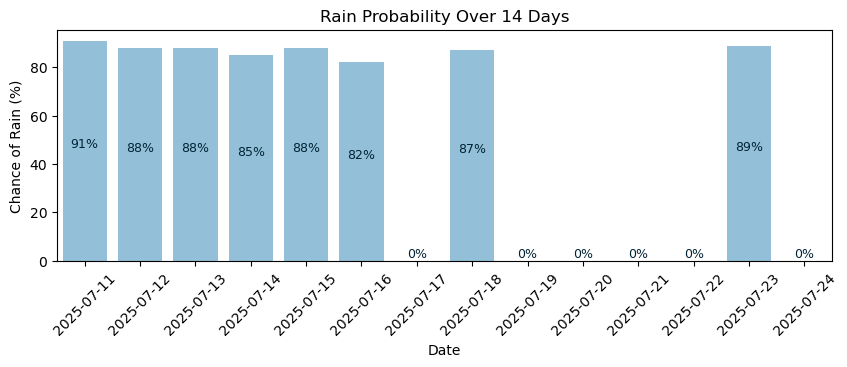

In [88]:
plt.figure(figsize=(10,3))
# sns.barplot(x=df['Date'], y=df['Rain_Chance'], palette="Blues_d")
ax = sns.barplot(x=df['Date'], y=df['Rain_Chance'], color='#88c3e3')

# Add value labels on top of each bar
for i, bar in enumerate(ax.patches):
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2,
            height/2,  # middle of the bar
            f'{df['Rain_Chance'][i]}%',
            ha='center', va='bottom', fontsize=9, color='#012336')

plt.xticks(rotation=45)
plt.ylabel("Chance of Rain (%)")
plt.title("Rain Probability Over 14 Days")

### UV Index + Humidity Combined Plot

In [89]:
date = []
uv = []
humidity = []

for pred in forecast['forecast']['forecastday']:
    date.append(pred['date'])
    uv.append(pred['day']['uv'])
    humidity.append(pred['day']['avghumidity'])

df = pd.DataFrame({'Date':date, 'UV':uv, 'Humidity':humidity})

In [109]:
# df

Text(0.5, 0.98, 'UV Index (Bar) and Humidity (Line) Over 14 Days')

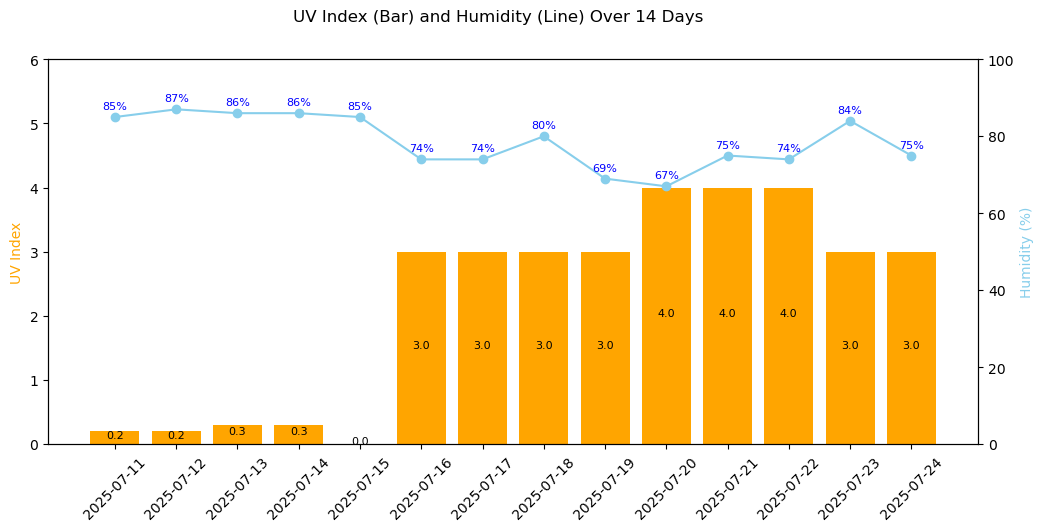

In [108]:
fig, ax1 = plt.subplots(figsize=(12, 5))

bar_width = 0.35
x = np.arange(len(df['Date']))

# Bar chart for UV
bar = ax1.bar(x, df['UV'], color='orange', label='UV Index')
ax1.set_ylabel('UV Index', color='orange')
ax1.set_ylim(0, max(df['UV']) + 2)
ax1.set_xticks(x)
ax1.set_xticklabels(df['Date'], rotation=45)

# Line plot for Humidity
ax2 = ax1.twinx()
line = ax2.plot(x, df['Humidity'], color='skyblue', marker='o', label='Humidity (%)')
ax2.set_ylabel('Humidity (%)', color='skyblue')
ax2.set_ylim(0, 100)

# Value labels
for i, val in enumerate(df['UV']):
    ax1.text(x[i], val/2, f"{val:.1f}", ha='center', fontsize=8)

for i, val in enumerate(df['Humidity']):
    ax2.text(x[i], val + 2, f"{val:.0f}%", ha='center', fontsize=8, color='blue')

fig.suptitle('UV Index (Bar) and Humidity (Line) Over 14 Days')
